In [ ]:
X=[[500],[700],[900]]   # Sqrt

y= [30,50,70]    # Price

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[1200],[1500],[2500],[5000]])

array([100., 130., 230., 480.])

## here we have sqrt and number of floors

In [ ]:
X =[[500,2],[700,5],[900,4]]   # sqrt & no.of floors
y=[30,50,70]    # costs

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[1200,6],[1300,4],[1500,2]])

array([100., 110., 130.])

## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

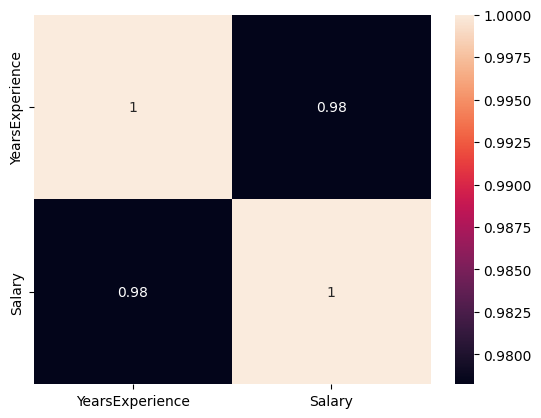

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot =True)

<ipython-input-33-f35941374136>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

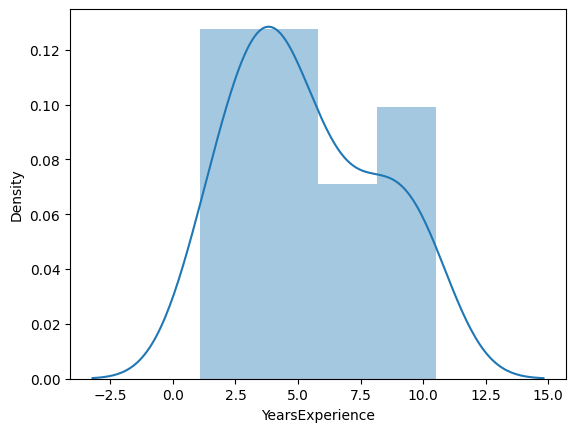

In [ ]:
sns.distplot(df.YearsExperience)

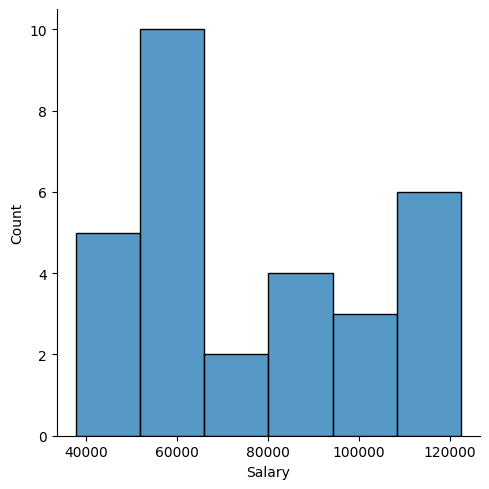

In [ ]:
sns.displot(df.Salary)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

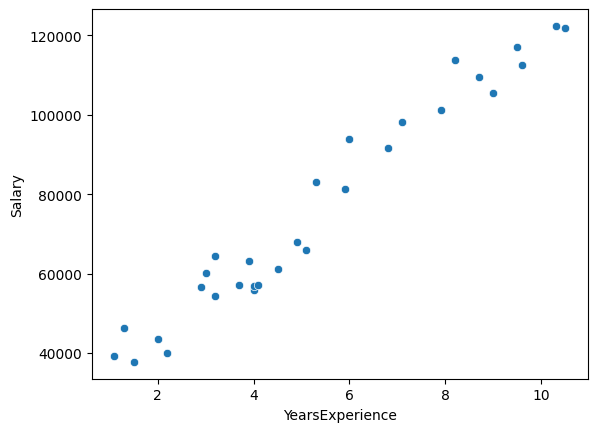

In [ ]:
sns.scatterplot(x=df.YearsExperience,y=df.Salary)

## X and y split

In [ ]:
X = df.drop(columns =['Salary'],axis =1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
y = df.Salary
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [ ]:
x_train.shape

(24, 1)

In [ ]:
x_test.shape

(6, 1)

In [ ]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [ ]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

## Model building

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train) # fitting the model on the training data

LinearRegression()

In [ ]:
y_pred =model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
## Compare

sal = pd.DataFrame({'Actual salary':y_test,'Predictd salary':y_pred})
sal


,Actual salary,Predictd salary
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [ ]:
# predict on random value

model.predict([[2.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47267.76442943])

In [ ]:
model.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213031.60168521])

## Multi Linear Regression

In [2]:
data = pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(108, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.State.nunique()

3

In [7]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
data.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [10]:
data.State =le.fit_transform(data.State)

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [12]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [13]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


<Axes: >

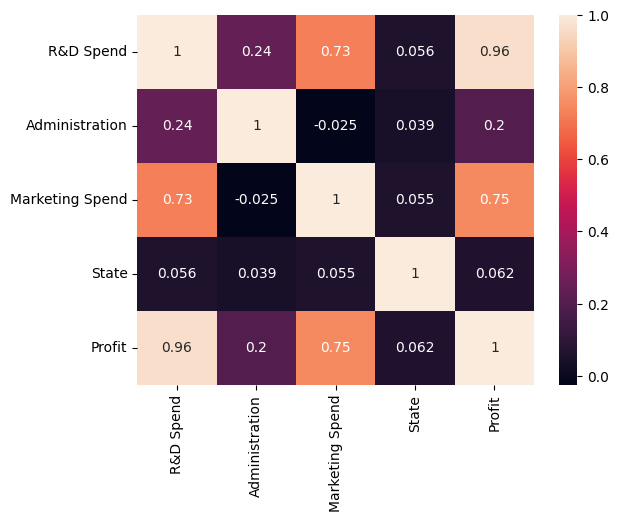

In [16]:
import seaborn as sns
sns.heatmap(data.corr(),annot =True)

In [17]:
data.corr().Profit.sort_values(ascending =False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
State              0.061662
Name: Profit, dtype: float64

In [18]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## X and y split

In [22]:
y = data['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [19]:
X= data.drop(columns = ['Profit'],axis =1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [23]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()

In [24]:
X_scaled =pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =0)

In [26]:
x_train.shape

(86, 4)

In [27]:
x_test.shape

(22, 4)

In [30]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State
84,-1.651331,0.088332,-1.814870,1.167315
10,0.601813,-0.410238,0.121034,-0.033352
75,-1.033670,0.195084,-0.117776,-0.033352
2,1.752320,-0.757668,1.643929,-0.033352
24,0.046546,-0.826216,-0.633593,1.167315


In [31]:
y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

## model building

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
# testing

y_predict = lr.predict(x_test)
y_predict

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [45]:
y_predict1 =lr.predict(x_train)
y_predict1

array([110339.36711747, 171326.34156933,  98169.73349428, 173984.89235457,
       116394.84120632,  48728.97472674,  98701.8096438 , 155793.74222107,
        83173.3979165 , 193329.17668167, 188881.89497877, 163705.08384309,
       129123.46097713, 116687.20083441, 116394.84120632, 129222.38731942,
       115568.27177598, 129123.46097713, 112966.00035112,  97478.45007514,
        60870.14590928, 188881.89497877,  75059.36096014,  70421.48595141,
        75026.31650688, 171326.34156933, 146304.26215166, 131295.5367997 ,
        75059.36096014,  70560.72299298, 163705.08384309, 149410.05441   ,
       134848.9192467 , 131295.5367997 , 193329.17668167,  89793.68742016,
       102116.15226573, 116752.96050775, 134241.68257226, 134241.68257226,
       110757.21399109,  91210.10094151, 110757.21399109,  98105.33260626,
       152502.87810448, 129222.38731942,  64558.26417224, 173984.89235457,
        97478.45007514, 181561.78529188, 149410.05441   ,  71079.10061908,
       114687.4839992 , 1

In [34]:
profit =pd.DataFrame({'Actual_profit':y_test,'Predicted_profit':y_predict})
profit

,Actual_profit,Predicted_profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


## Testing with random values

In [35]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [39]:
lr.predict([[162597.70,101145.55,407934.54,2]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73656.34393585])

In [40]:
lr.predict([[142107.70,91391.77,366168.42,2]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64769.80816527])

## Evaluation metrics for Regression Problem

In [41]:
from sklearn import metrics

In [43]:
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(y_test,y_predict))

0.9258962347553816


In [46]:
# evaluating traing accuracy

print(metrics.r2_score(y_train,y_predict1))

0.937696994680168


In [47]:
# MSE (Mean square Error)

print(metrics.mean_squared_error(y_test,y_predict))

96015241.54707724


In [48]:
# RMSE (Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

9798.7367322057


## Polynomial regression
